In [ ]:
  # Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
df.drop(["User ID", "Gender"], axis = 1, inplace = True)

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.shape

(400, 3)

In [ ]:
num_feat = df.drop("Purchased", axis = 1)

In [ ]:
num_feat.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

Text(0.5, 0, 'EstimatedSalary')

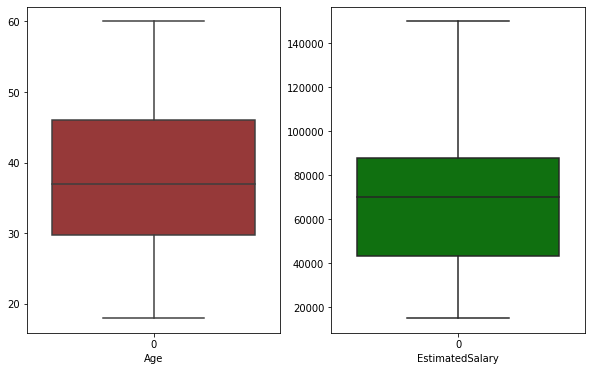

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(data=num_feat['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Age')

sns.boxplot(data=num_feat['EstimatedSalary'], ax=ax[1], color='g')
ax[1].set_xlabel('EstimatedSalary')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'EstimatedSalary')

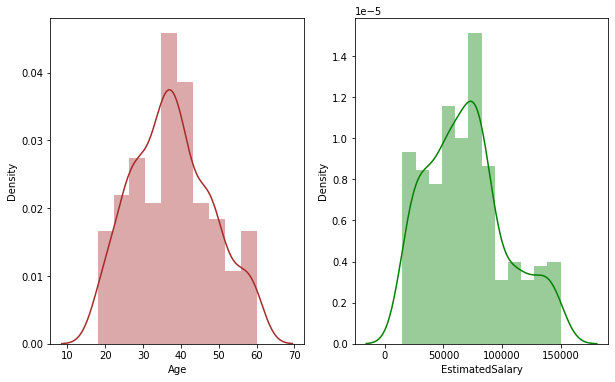

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.distplot(num_feat['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Age')

sns.distplot(num_feat['EstimatedSalary'], ax=ax[1], color='g')
ax[1].set_xlabel('EstimatedSalary')

Text(0.5, 0, 'EstimatedSalary')

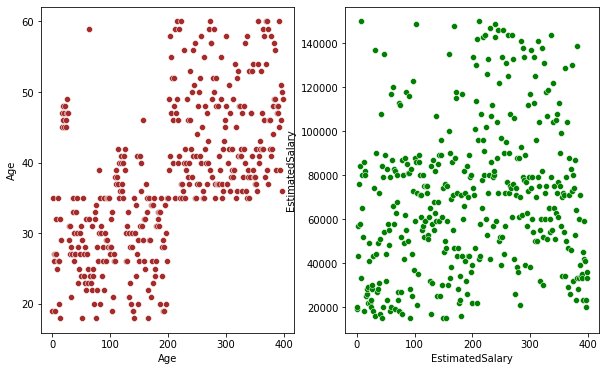

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.scatterplot(data=num_feat['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Age')

sns.scatterplot(data=num_feat['EstimatedSalary'], ax=ax[1], color='g')
ax[1].set_xlabel('EstimatedSalary')

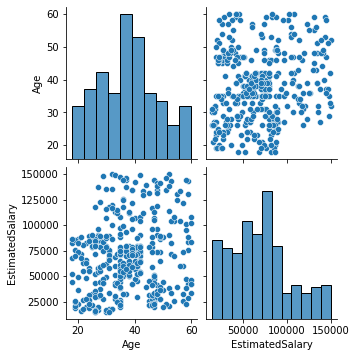

In [ ]:
sns.pairplot(num_feat)

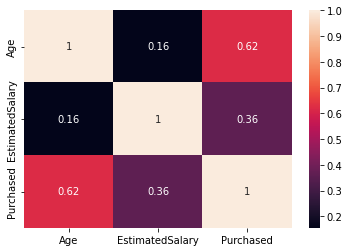

In [ ]:
sns.heatmap(df.corr(), annot = True)

**Splitting the dataset into the Training set and Test set**

In [2]:
x = num_feat
y = df["Purchased"]
#Split the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

NameError: ignored

**Feature Scaling**

In [1]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

NameError: ignored

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

**Step 3 | Predection**

In [ ]:
y_pred = log_reg.predict(x_test)

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8875

**Making the Confusion Matrix**

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[50,  2],
       [ 7, 21]])

**Visualization**

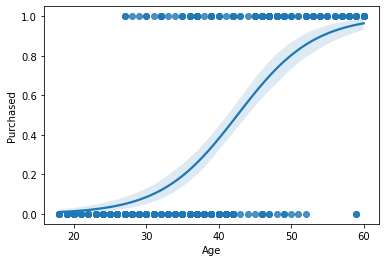

In [ ]:
sns.regplot(x = "Age", y = "Purchased", data = df, logistic = True)

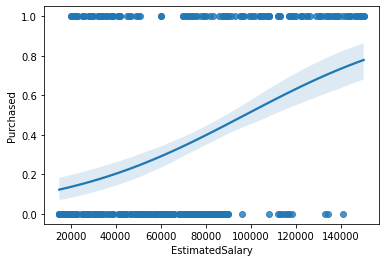

In [ ]:
sns.regplot(x = "EstimatedSalary", y = "Purchased", data = df, logistic = True)